## Importing libraries

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st
from sklearn.svm import SVC as svc
from sklearn.naive_bayes import GaussianNB as gnb
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import LabelEncoder as le
from sklearn.metrics import classification_report as clr
from sklearn.model_selection import cross_validate as cv
from yellowbrick.classifier import classification_report as cr, confusion_matrix as cm

## Loading the data set

The data set is assigned to a Pandas data frame.

In [62]:
df = pd.read_csv("data/spect.csv", sep=',', index_col=False, decimal=',')

# Types of attributes and null values

Description of the dataset

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   OVERALL_DIAGNOSIS  267 non-null    int64
 1   F1                 267 non-null    int64
 2   F2                 267 non-null    int64
 3   F3                 267 non-null    int64
 4   F4                 267 non-null    int64
 5   F5                 267 non-null    int64
 6   F6                 267 non-null    int64
 7   F7                 267 non-null    int64
 8   F8                 267 non-null    int64
 9   F9                 267 non-null    int64
 10  F10                267 non-null    int64
 11  F11                267 non-null    int64
 12  F12                267 non-null    int64
 13  F13                267 non-null    int64
 14  F14                267 non-null    int64
 15  F15                267 non-null    int64
 16  F16                267 non-null    int64
 17  F17             

Count of null values, for each attribute

In [64]:
df.isnull().sum()

OVERALL_DIAGNOSIS    0
F1                   0
F2                   0
F3                   0
F4                   0
F5                   0
F6                   0
F7                   0
F8                   0
F9                   0
F10                  0
F11                  0
F12                  0
F13                  0
F14                  0
F15                  0
F16                  0
F17                  0
F18                  0
F19                  0
F20                  0
F21                  0
F22                  0
dtype: int64

As you can see, we don't have any missing
values in the data sets.

# Remove noise and outliers


In [65]:
from scipy.stats import zscore
z_scores = zscore(df)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = df[filtered_entries]
if len(filtered_entries)!=len(df):
    new_df.to_csv(r'data/spect.csv', index=True, header=True)
new_df.describe()

,OVERALL_DIAGNOSIS,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22
count,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,...,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000
mean,0.794007,0.445693,0.247191,0.393258,0.284644,0.404494,0.235955,0.284644,0.426966,0.310861,...,0.494382,0.303371,0.176030,0.310861,0.142322,0.131086,0.247191,0.322097,0.363296,0.411985
std,0.405185,0.497975,0.432189,0.489391,0.452092,0.491716,0.425392,0.452092,0.495566,0.463715,...,0.500907,0.460577,0.381561,0.463715,0.350036,0.338128,0.432189,0.468158,0.481852,0.493117
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# **Standard correlation charts**
It is used to find a meaningful relation between metrics.

<Axes: >

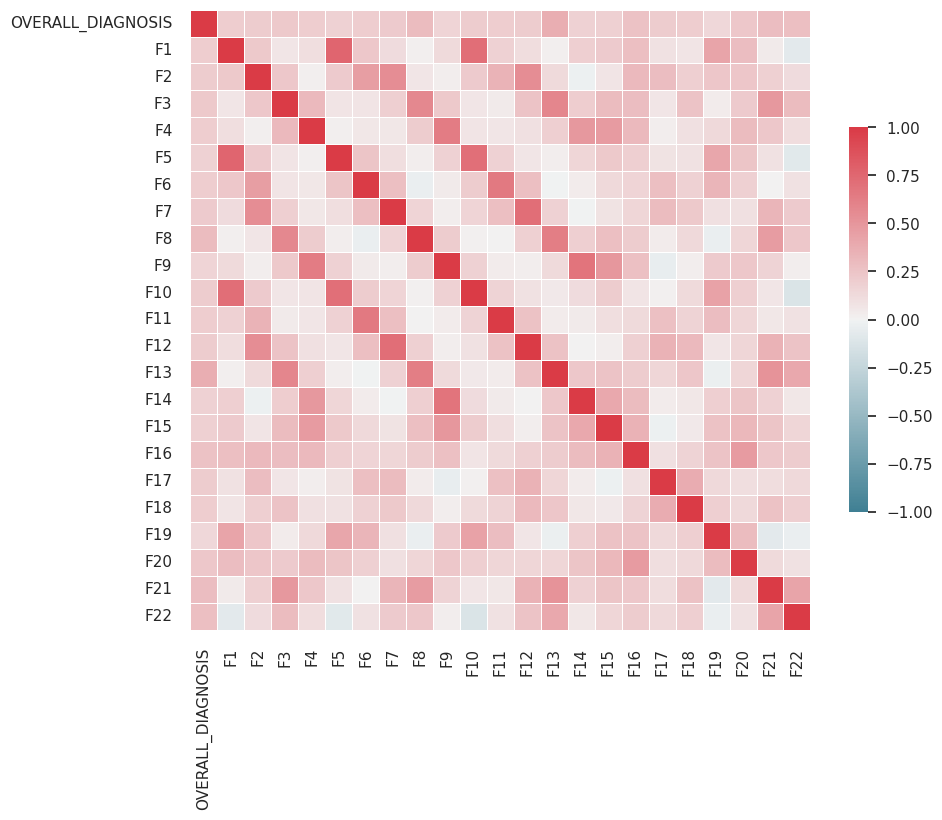

In [66]:
correlation = new_df.corr()
sns.set(style="white")

fnew, axnew = plt.subplots(figsize=(10,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(correlation, cmap=cmap, vmax=1,vmin=-1, center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.5})

# **Defining classification labels**

In [67]:
l = le()
new_df['label'] = l.fit_transform(new_df['OVERALL_DIAGNOSIS'])

# **Remove Unused Collumn**

In [68]:
new_df.drop(columns=['OVERALL_DIAGNOSIS'], axis=1, inplace=True)

# **Splitting Dataset**
We have divided the dataset into train and test sets.

In [69]:
label = new_df.pop('label')
train_set, test_set, train_label, test_label = tts(df, label, stratify=label, test_size=0.5, random_state=42)

print('Train set size: ', len(train_set))
print('Test set size: ', len(test_set))

Train set size:  133
Test set size:  134


# **Report Prediction Function**

In [70]:
def report_scores(classifier, test_pred, conf_mat=True, report=True):

    scores = cv(classifier, train_set, train_label, cv=3, return_train_score= True, scoring='accuracy')

    print('Train score ', st.mean(scores['train_score']))
    print('Test score ', st.mean(scores['test_score']))
    print('\n')

    classes = ['0','1']

    if conf_mat:
        cm(classifier, train_set, train_label, test_set, test_label,
        classes=classes)

        plt.tight_layout()

    if report:
        print(clr(test_label, test_pred))
        cr(classifier, train_set, train_label, test_set, test_label,
           classes=classes, support=True)

        plt.show()

# **Classification with Naive Bayes**

Train score  1.0
Test score  1.0




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


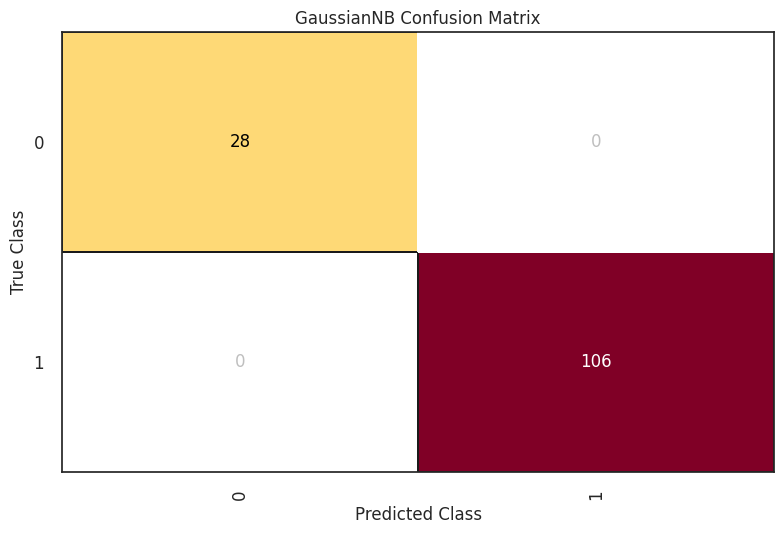

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00       106

    accuracy                           1.00       134
   macro avg       1.00      1.00      1.00       134
weighted avg       1.00      1.00      1.00       134



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


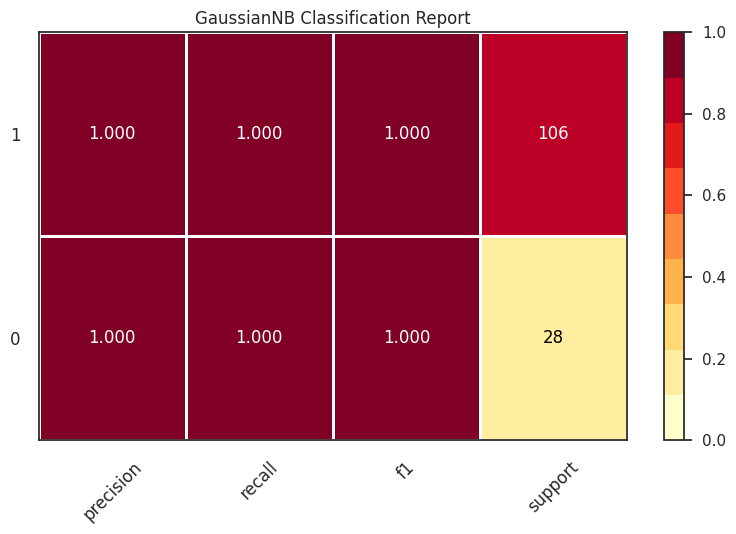

In [71]:
nb = gnb()
nb.fit(train_set.values, train_label)

test_pred_gnb = nb.predict(test_set.values)

report_scores(nb, test_pred_gnb)


# **Classification with Support Vector Classifier**

Train score  1.0
Test score  1.0




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


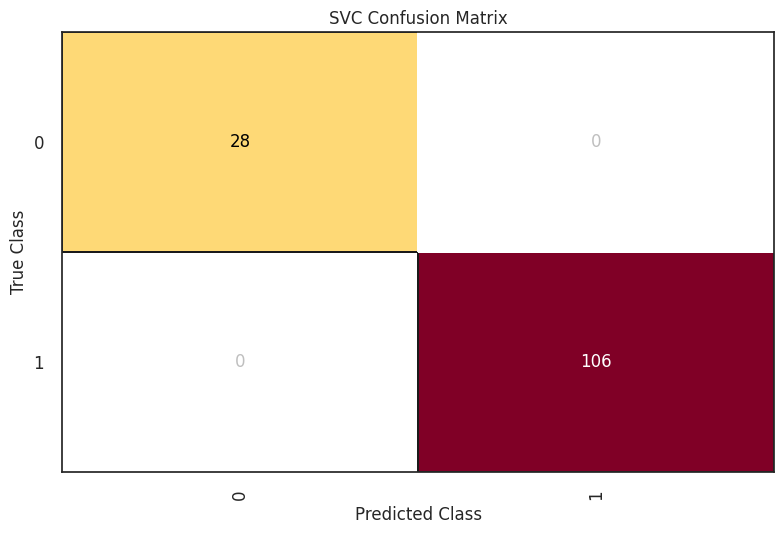

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00       106

    accuracy                           1.00       134
   macro avg       1.00      1.00      1.00       134
weighted avg       1.00      1.00      1.00       134



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


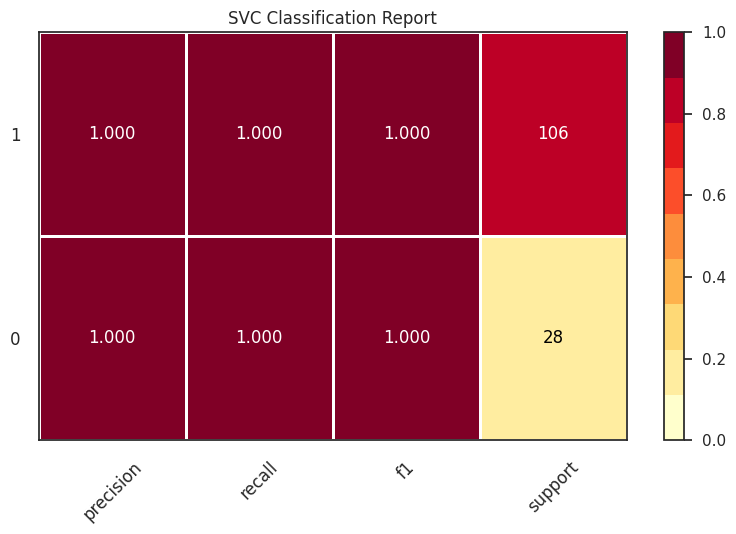

In [74]:
svm = svc(kernel='linear')

svm = svm.fit(train_set.values, train_label)

test_pred_svm = svm.predict(test_set.values)

report_scores(svm, test_pred_svm)

# **Classification with Decision Tree**

Train score  1.0
Test score  1.0




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


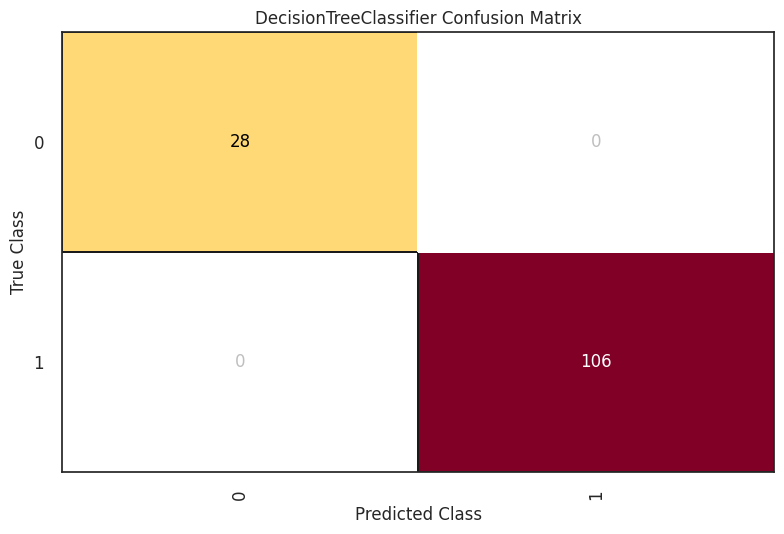

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00       106

    accuracy                           1.00       134
   macro avg       1.00      1.00      1.00       134
weighted avg       1.00      1.00      1.00       134



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


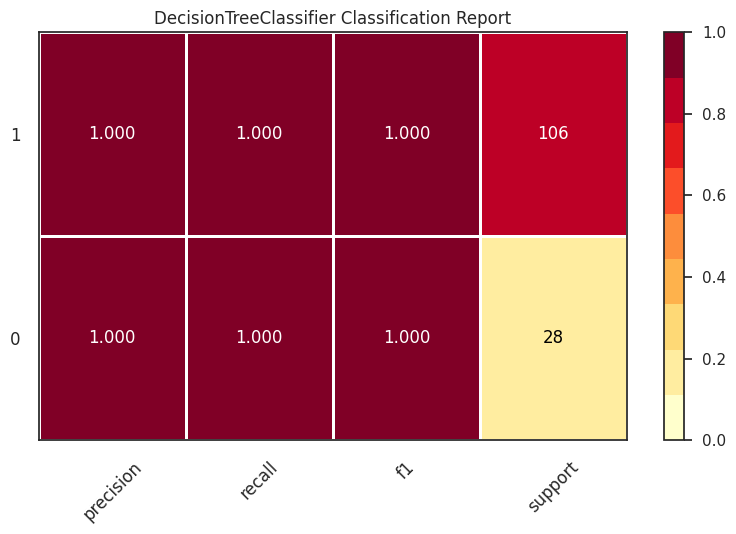

In [76]:
dt = dtc()

dt = dt.fit(train_set.values, train_label)

test_pred_dt = dt.predict(test_set.values)

report_scores(dt, test_pred_dt)